In [2]:
import pandas as pd

#Read emmployee data
df = pd.read_csv('data/employee_churn_data.csv')

In [3]:
#Get overview of data
df.head()

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
0,operations,0,0.577569,3,low,5.0,0.626759,0,180.866070,no
1,operations,0,0.751900,3,medium,6.0,0.443679,0,182.708149,no
2,support,0,0.722548,3,medium,6.0,0.446823,0,184.416084,no
3,logistics,0,0.675158,4,high,8.0,0.440139,0,188.707545,no
4,sales,0,0.676203,3,high,5.0,0.577607,1,179.821083,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9540 entries, 0 to 9539
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   department     9540 non-null   object 
 1   promoted       9540 non-null   int64  
 2   review         9540 non-null   float64
 3   projects       9540 non-null   int64  
 4   salary         9540 non-null   object 
 5   tenure         9540 non-null   float64
 6   satisfaction   9540 non-null   float64
 7   bonus          9540 non-null   int64  
 8   avg_hrs_month  9540 non-null   float64
 9   left           9540 non-null   object 
dtypes: float64(4), int64(3), object(3)
memory usage: 745.4+ KB


In [5]:
df.describe()

,promoted,review,projects,tenure,satisfaction,bonus,avg_hrs_month
count,9540.000000,9540.000000,9540.000000,9540.000000,9540.000000,9540.000000,9540.000000
mean,0.030294,0.651826,3.274843,6.556184,0.504645,0.212055,184.661571
std,0.171403,0.085307,0.579136,1.415432,0.158555,0.408785,4.144831
min,0.000000,0.310000,2.000000,2.000000,0.000000,0.000000,171.374060
25%,0.000000,0.592884,3.000000,5.000000,0.386801,0.000000,181.472085
50%,0.000000,0.647456,3.000000,7.000000,0.500786,0.000000,184.628796
75%,0.000000,0.708379,4.000000,8.000000,0.622607,0.000000,187.728708
max,1.000000,1.000000,5.000000,12.000000,1.000000,1.000000,200.861656


<AxesSubplot:>

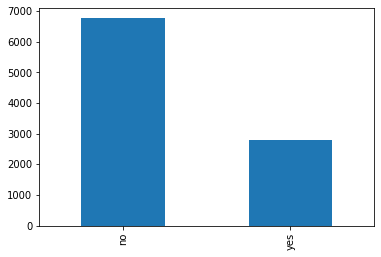

In [6]:
##Display bar graph of churn
df.left.value_counts().plot(kind='bar')

In [7]:
#Calculate overall churn rate
df.left.value_counts()[1]/df.left.value_counts().sum()

0.2918238993710692

In [8]:
#Calculate churn rates by department
left_df = df.loc[df.left == 'yes',:]

churn_rates = left_df.groupby('department').left.value_counts()/df.groupby('department').left.value_counts().sum()

#order churn rates descending
churn_rates = churn_rates.sort_values(ascending=False)

new_index = []

for i in range(len(churn_rates.index)):
    #append department name to index in correct order
    new_index.append(churn_rates.index[i][0])

new_index

#Create dataframe with churn rates and departments
churn_df = pd.DataFrame({'department': new_index, 'churn_rate': churn_rates.values})

<AxesSubplot:ylabel='department'>

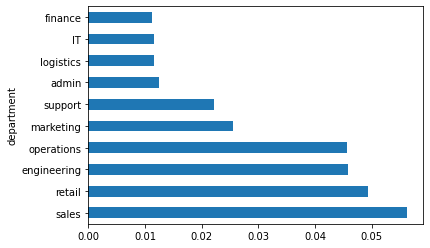

In [9]:
#Plot horizontal bar chart of churn rates by department
churn_df.plot(kind='barh', x='department', y='churn_rate', legend=False)

In [10]:
#Mean promoted employees by department
mean_df = df.groupby('department').mean()

#Add promoted mean to churn dataframe
churn_df = pd.merge(churn_df, mean_df, on='department', how='left')
churn_df

,department,churn_rate,promoted,review,projects,tenure,satisfaction,bonus,avg_hrs_month
0,sales,0.056289,0.026553,0.651631,3.286245,6.535847,0.504520,0.211896,184.616739
1,retail,0.049371,0.033744,0.650152,3.266061,6.591175,0.502769,0.218689,184.735075
2,engineering,0.045807,0.023087,0.650601,3.263852,6.558047,0.504944,0.211082,184.691962
3,operations,0.045702,0.029566,0.653397,3.271353,6.608410,0.504620,0.206965,184.812006
4,marketing,0.025472,0.042394,0.657694,3.280549,6.503741,0.502411,0.219451,184.469963
5,support,0.022222,0.031293,0.650467,3.268027,6.564626,0.506579,0.204082,184.642816
6,admin,0.012474,0.037825,0.647086,3.278960,6.498818,0.519444,0.186761,184.538120
7,logistics,0.011635,0.019444,0.654374,3.275000,6.527778,0.493084,0.208333,184.589924
8,IT,0.011530,0.022472,0.647746,3.289326,6.609551,0.515818,0.221910,184.820946
9,finance,0.011321,0.047264,0.654934,3.293532,6.440299,0.497183,0.231343,184.375116


<AxesSubplot:>

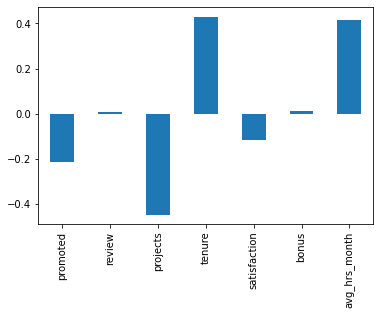

In [11]:
#Plot correlation matrix of churn rates and mean variables by department
churn_df.corr()['churn_rate'][1:len(churn_df)].plot(kind='bar')


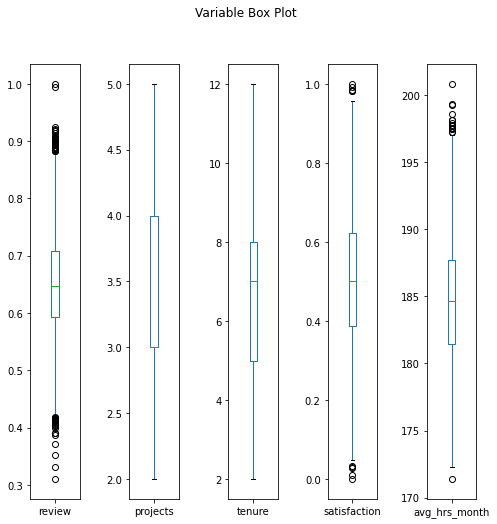

In [13]:
import matplotlib.pyplot as plt

#Plot distribution of variables
df[['review','projects','tenure','satisfaction','avg_hrs_month']].plot(kind='box', subplots=True, layout=(1,5), sharex=False, sharey=False, figsize=(8,8), title='Variable Box Plot')
plt.subplots_adjust(wspace = 1)

,review,projects,tenure,satisfaction,avg_hrs_month
left,,,,,
no,"AxesSubplot(0.125,0.125;0.133621x0.755)","AxesSubplot(0.285345,0.125;0.133621x0.755)","AxesSubplot(0.44569,0.125;0.133621x0.755)","AxesSubplot(0.606034,0.125;0.133621x0.755)","AxesSubplot(0.766379,0.125;0.133621x0.755)"
yes,"AxesSubplot(0.125,0.125;0.133621x0.755)","AxesSubplot(0.285345,0.125;0.133621x0.755)","AxesSubplot(0.44569,0.125;0.133621x0.755)","AxesSubplot(0.606034,0.125;0.133621x0.755)","AxesSubplot(0.766379,0.125;0.133621x0.755)"


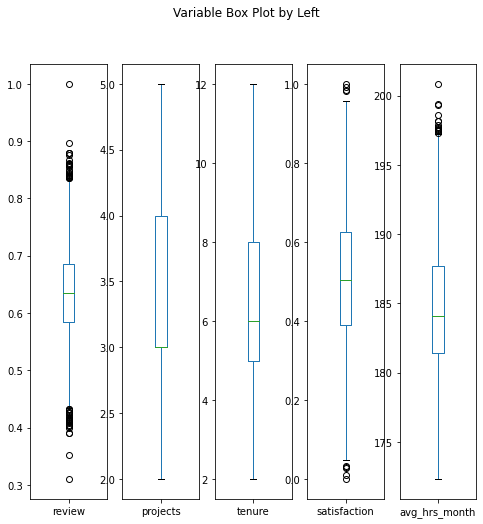

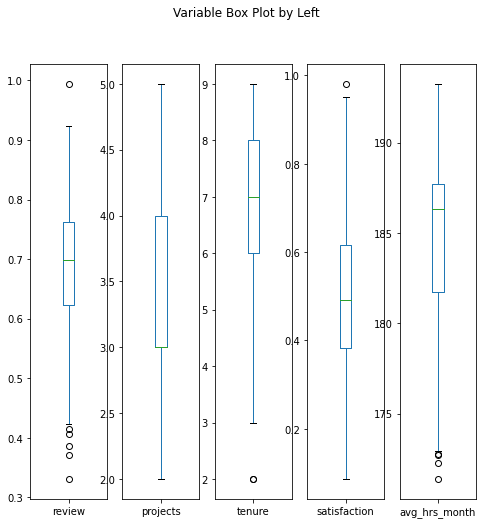

In [16]:
#Plot distribution of variables by left
df.groupby('left')[['review','projects','tenure','satisfaction','avg_hrs_month']].plot(kind='box', subplots=True, layout=(1,5), sharex=False, sharey=False, figsize=(8,8), title='Variable Box Plot by Left')

In [25]:
import pycaret.classification

ModuleNotFoundError: No module named 'pycaret'

In [26]:
!pip install pycaret

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'


ERROR: Could not install packages due to an OSError: ("Connection broken: ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None)", ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))

